In [1]:
import pysal.contrib.clusterpy as cp
%pylab inline

ClusterPy: Library of spatially constrained clustering algorithms
Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pysal as ps
from collections import Counter

In [3]:
columbus = cp.loadArcData(ps.examples.get_path('columbus.shp'))
columbus.fieldNames
n = len(columbus.Wqueen)
#columbus.generateData('Uniform', 'rook', 1, 1, 10)
columbus.dataOperation("CONSTANT = 1")
columbus.cluster('maxpTabu', ['CRIME',  'CONSTANT'], threshold=4, dissolve=0, std=0)


Adding CONSTANT to fieldNames
Adding values from 1 to Y
Adding variables
Done
Getting variables
Variables successfully extracted
Running max-p-regions model (Duque, Anselin and Rey, 2010)
Local search method: Tabu Search
Number of areas:  49
threshold value:  4
FINAL SOLUTION:  [6, 3, 6, 3, 6, 6, 3, 3, 2, 2, 0, 0, 0, 0, 9, 0, 2, 9, 0, 5, 8, 2, 5, 9, 9, 9, 1, 1, 1, 8, 4, 5, 7, 4, 7, 4, 8, 1, 4, 5, 5, 4, 8, 7, 7, 4, 5, 7, 7]
FINAL OF:  3458.63068498
Done
Adding variables
Done


In [4]:
Counter(columbus.region2areas)

Counter({0: 6, 1: 4, 2: 4, 3: 4, 4: 6, 5: 6, 6: 4, 7: 6, 8: 4, 9: 5})

In [5]:
columbus.cluster('arisel', ['CRIME'], 5, wType='rook', inits=10, dissolve=0)
#calif.cluster('arisel', ['PCR2002'], 9, wType='rook', inits=10, dissolve=1)

Getting variables
Variables successfully extracted
Running original Arisel algorithm
Number of areas:  49
Number of regions:  5
initial Solution:  [2, 2, 2, 2, 0, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 4, 0, 1, 4, 1, 1, 4, 0, 0, 0, 0, 0, 0, 4, 1, 3, 4, 3, 4, 3, 0, 4, 1, 1, 4, 3, 3, 3, 4, 1, 3, 3]
initial O.F:  4292.34464226
FINAL SOLUTION:  [2, 2, 2, 2, 0, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 4, 1, 4, 3, 0, 4, 1, 1, 4, 3, 1, 1, 4, 1, 1, 1]
FINAL OF:  3695.95184733
Done
Adding variables
Done


In [5]:
# regionalization solutions are added as a list of region ids at the end
columbus.fieldNames

['ID',
 'AREA',
 'PERIMETER',
 'COLUMBUS_',
 'COLUMBUS_I',
 'POLYID',
 'NEIG',
 'HOVAL',
 'INC',
 'CRIME',
 'OPEN',
 'PLUMB',
 'DISCBD',
 'X',
 'Y',
 'NSA',
 'NSB',
 'EW',
 'CP',
 'THOUS',
 'NEIGNO',
 'CONSTANT',
 'maxpTabu_20150831012909']

In [7]:
warisel = ps.block_weights(columbus.region2areas)

In [8]:
warisel.neighbors

{0: [1L, 2L, 3L, 6L, 7L],
 1: [0L, 2L, 3L, 6L, 7L],
 2: [0L, 1L, 3L, 6L, 7L],
 3: [0L, 1L, 2L, 6L, 7L],
 4: [10L,
  11L,
  12L,
  13L,
  14L,
  15L,
  17L,
  18L,
  20L,
  23L,
  24L,
  25L,
  26L,
  27L,
  28L,
  29L,
  32L,
  37L],
 5: [8L, 9L, 16L, 19L, 21L, 22L, 31L, 34L, 39L, 40L, 43L, 44L, 46L, 47L, 48L],
 6: [0L, 1L, 2L, 3L, 7L],
 7: [0L, 1L, 2L, 3L, 6L],
 8: [5L, 9L, 16L, 19L, 21L, 22L, 31L, 34L, 39L, 40L, 43L, 44L, 46L, 47L, 48L],
 9: [5L, 8L, 16L, 19L, 21L, 22L, 31L, 34L, 39L, 40L, 43L, 44L, 46L, 47L, 48L],
 10: [4L,
  11L,
  12L,
  13L,
  14L,
  15L,
  17L,
  18L,
  20L,
  23L,
  24L,
  25L,
  26L,
  27L,
  28L,
  29L,
  32L,
  37L],
 11: [4L,
  10L,
  12L,
  13L,
  14L,
  15L,
  17L,
  18L,
  20L,
  23L,
  24L,
  25L,
  26L,
  27L,
  28L,
  29L,
  32L,
  37L],
 12: [4L,
  10L,
  11L,
  13L,
  14L,
  15L,
  17L,
  18L,
  20L,
  23L,
  24L,
  25L,
  26L,
  27L,
  28L,
  29L,
  32L,
  37L],
 13: [4L,
  10L,
  11L,
  12L,
  14L,
  15L,
  17L,
  18L,
  20L,
  23L,
  24L,
  25L,


In [9]:
wregimes = ps.block_weights(columbus.region2areas)

In [10]:
columbus.region2areas[5]

1

In [11]:
wregimes.n

49

In [12]:
wregimes.neighbors

{0: [1L, 2L, 3L, 6L, 7L],
 1: [0L, 2L, 3L, 6L, 7L],
 2: [0L, 1L, 3L, 6L, 7L],
 3: [0L, 1L, 2L, 6L, 7L],
 4: [10L,
  11L,
  12L,
  13L,
  14L,
  15L,
  17L,
  18L,
  20L,
  23L,
  24L,
  25L,
  26L,
  27L,
  28L,
  29L,
  32L,
  37L],
 5: [8L, 9L, 16L, 19L, 21L, 22L, 31L, 34L, 39L, 40L, 43L, 44L, 46L, 47L, 48L],
 6: [0L, 1L, 2L, 3L, 7L],
 7: [0L, 1L, 2L, 3L, 6L],
 8: [5L, 9L, 16L, 19L, 21L, 22L, 31L, 34L, 39L, 40L, 43L, 44L, 46L, 47L, 48L],
 9: [5L, 8L, 16L, 19L, 21L, 22L, 31L, 34L, 39L, 40L, 43L, 44L, 46L, 47L, 48L],
 10: [4L,
  11L,
  12L,
  13L,
  14L,
  15L,
  17L,
  18L,
  20L,
  23L,
  24L,
  25L,
  26L,
  27L,
  28L,
  29L,
  32L,
  37L],
 11: [4L,
  10L,
  12L,
  13L,
  14L,
  15L,
  17L,
  18L,
  20L,
  23L,
  24L,
  25L,
  26L,
  27L,
  28L,
  29L,
  32L,
  37L],
 12: [4L,
  10L,
  11L,
  13L,
  14L,
  15L,
  17L,
  18L,
  20L,
  23L,
  24L,
  25L,
  26L,
  27L,
  28L,
  29L,
  32L,
  37L],
 13: [4L,
  10L,
  11L,
  12L,
  14L,
  15L,
  17L,
  18L,
  20L,
  23L,
  24L,
  25L,


## Attrribute data from a csv file and a W from a gal file

In [13]:
mexico = cp.importCsvData(ps.examples.get_path('mexico.csv'))

In [14]:
mexico.fieldNames

['ID',
 'State',
 'pcgdp1940',
 'pcgdp1950',
 'pcgdp1960',
 'pcgdp1970',
 'pcgdp1980',
 'pcgdp1990',
 'pcgdp2000',
 'hanson03',
 'hanson98',
 'esquivel99',
 'inegi',
 'inegi2']

In [15]:
w = ps.open(ps.examples.get_path('mexico.gal')).read()

In [16]:
w.n

32

In [17]:
cp.addRook2Layer(ps.examples.get_path('mexico.gal'), mexico)

In [18]:
mexico.Wrook

{0: [31, 13],
 1: [2, 25],
 2: [1],
 3: [30, 22, 26],
 4: [19, 26, 29],
 5: [6, 9, 24, 25],
 6: [18, 23, 31, 9, 5],
 7: [13, 15],
 8: [16, 14],
 9: [5, 6, 31, 13, 17, 24],
 10: [23, 21, 31, 15, 13],
 11: [15, 14, 16, 20, 19],
 12: [21, 23, 29, 20, 28, 14],
 13: [17, 31, 0, 23, 10, 15, 7, 9],
 14: [21, 12, 28, 20, 16, 11, 15, 8],
 15: [7, 13, 10, 21, 14, 11],
 16: [14, 8, 20, 11],
 17: [24, 9, 31, 13],
 18: [6, 27, 23, 31],
 19: [11, 20, 29, 4],
 20: [29, 19, 11, 16, 14, 28, 12],
 21: [23, 12, 14, 15, 10],
 22: [30, 3],
 23: [18, 27, 29, 12, 21, 10, 31, 6, 13],
 24: [25, 5, 9, 17],
 25: [1, 5, 24],
 26: [3, 4, 29],
 27: [18, 29, 23],
 28: [12, 20, 14],
 29: [26, 4, 19, 20, 12, 23, 27],
 30: [3, 22],
 31: [18, 23, 10, 0, 13, 17, 9, 6]}

In [19]:
mexico.cluster('arisel', ['pcgdp1940'], 5, wType='rook', inits=10, dissolve=0)


Getting variables
Variables successfully extracted
Running original Arisel algorithm
Number of areas:  32
Number of regions:  5
initial Solution:  [2, 3, 3, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2]
initial O.F:  287200188.741
FINAL SOLUTION:  [2, 3, 3, 0, 0, 2, 2, 2, 4, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 2, 0, 0]
FINAL OF:  186036319.667
Done
Adding variables
Done


In [20]:
mexico.fieldNames

['ID',
 'State',
 'pcgdp1940',
 'pcgdp1950',
 'pcgdp1960',
 'pcgdp1970',
 'pcgdp1980',
 'pcgdp1990',
 'pcgdp2000',
 'hanson03',
 'hanson98',
 'esquivel99',
 'inegi',
 'inegi2',
 'arisel_20140823211523']

In [21]:
mexico.getVars('pcgdp1940')

Getting variables
Variables successfully extracted


{0: [10384.0],
 1: [22361.0],
 2: [9573.0],
 3: [3758.0],
 4: [2934.0],
 5: [8578.0],
 6: [8537.0],
 7: [6909.0],
 8: [17816.0],
 9: [12132.0],
 10: [4359.0],
 11: [2181.0],
 12: [4414.0],
 13: [5309.0],
 14: [3408.0],
 15: [3327.0],
 16: [6936.0],
 17: [4836.0],
 18: [9073.0],
 19: [1892.0],
 20: [3569.0],
 21: [11016.0],
 22: [21965.0],
 23: [4372.0],
 24: [4840.0],
 25: [6399.0],
 26: [2459.0],
 27: [7508.0],
 28: [3605.0],
 29: [5203.0],
 30: [7990.0],
 31: [3734.0]}

In [22]:
# mexico example all together

csvfile = ps.examples.get_path('mexico.csv')
galfile = ps.examples.get_path('mexico.gal')

mexico = cp.importCsvData(csvfile)
cp.addRook2Layer(galfile, mexico)
mexico.cluster('arisel', ['pcgdp1940'], 5, wType='rook', inits=10, dissolve=0)


Getting variables
Variables successfully extracted
Running original Arisel algorithm
Number of areas:  32
Number of regions:  5
initial Solution:  [2, 0, 0, 1, 1, 2, 2, 2, 4, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 3, 2, 2, 2, 1, 2, 1, 2, 1, 2]
initial O.F:  228683641.198
FINAL SOLUTION:  [2, 0, 0, 1, 1, 2, 2, 2, 4, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 3, 1, 1, 2, 1, 2, 1, 2, 1, 1]
FINAL OF:  186036319.667
Done
Adding variables
Done


In [23]:
mexico.region2areas.index(2)

0

In [24]:
mexico.Wrook[0]

[31, 13]

In [25]:
mexico.getVars('State')

Getting variables
Variables successfully extracted


{0: ['Aguascalientes'],
 1: ['Baja California'],
 2: ['Baja California Sur'],
 3: ['Campeche'],
 4: ['Chiapas'],
 5: ['Chihuahua'],
 6: ['Coahuila'],
 7: ['Colima'],
 8: ['Distrito Federal'],
 9: ['Durango'],
 10: ['Guanajuato'],
 11: ['Guerrero'],
 12: ['Hidalgo'],
 13: ['Jalisco'],
 14: ['Mexico'],
 15: ['Michoacan'],
 16: ['Morelos'],
 17: ['Nayarit'],
 18: ['Nuevo Leon'],
 19: ['Oaxaca'],
 20: ['Puebla'],
 21: ['Quertaro'],
 22: ['Quintana Roo'],
 23: ['San Luis Potosi'],
 24: ['Sinaloa'],
 25: ['Sonora'],
 26: ['Tabasco'],
 27: ['Tamaulipas'],
 28: ['Tlaxcala'],
 29: ['Veracruz'],
 30: ['Yucatan'],
 31: ['Zacatecas']}

In [26]:
regions = np.array(mexico.region2areas)

In [27]:
regions

array([2, 0, 0, 1, 1, 2, 2, 2, 4, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 3,
       1, 1, 2, 1, 2, 1, 2, 1, 1])

In [28]:
Counter(regions)

Counter({1: 16, 2: 12, 0: 2, 3: 1, 4: 1})

## Attrribute data from a csv file and an external `W` object

In [6]:
mexico = cp.importCsvData(ps.examples.get_path('mexico.csv'))

In [7]:
w = ps.open(ps.examples.get_path('mexico.gal')).read()

In [8]:
cp.addW2Layer(w, mexico)

In [9]:
mexico.Wrook

{'0': ['31', '13'],
 '1': ['2', '25'],
 '10': ['23', '21', '31', '15', '13'],
 '11': ['15', '14', '16', '20', '19'],
 '12': ['21', '23', '29', '20', '28', '14'],
 '13': ['17', '31', '0', '23', '10', '15', '7', '9'],
 '14': ['21', '12', '28', '20', '16', '11', '15', '8'],
 '15': ['7', '13', '10', '21', '14', '11'],
 '16': ['14', '8', '20', '11'],
 '17': ['24', '9', '31', '13'],
 '18': ['6', '27', '23', '31'],
 '19': ['11', '20', '29', '4'],
 '2': ['1'],
 '20': ['29', '19', '11', '16', '14', '28', '12'],
 '21': ['23', '12', '14', '15', '10'],
 '22': ['30', '3'],
 '23': ['18', '27', '29', '12', '21', '10', '31', '6', '13'],
 '24': ['25', '5', '9', '17'],
 '25': ['1', '5', '24'],
 '26': ['3', '4', '29'],
 '27': ['18', '29', '23'],
 '28': ['12', '20', '14'],
 '29': ['26', '4', '19', '20', '12', '23', '27'],
 '3': ['30', '22', '26'],
 '30': ['3', '22'],
 '31': ['18', '23', '10', '0', '13', '17', '9', '6'],
 '4': ['19', '26', '29'],
 '5': ['6', '9', '24', '25'],
 '6': ['18', '23', '31', '9', 

In [10]:
mexico.cluster('arisel', ['pcgdp1940'], 5, wType='rook', inits=10, dissolve=0)

Getting variables
Variables successfully extracted
Running original Arisel algorithm
Number of areas:  32
Number of regions:  5
Disconnected areas neighs:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
initial Solution:  [-1, 2, -1, -1, -1, -1, -1, -1, 4, 1, -1, -1, -1, -1, -1, 3, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1]
initial O.F:  0.0
FINAL SOLUTION:  [-1, 2, -1, -1, -1, -1, -1, -1, 4, 1, -1, -1, -1, -1, -1, 3, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1]
FINAL OF:  0.0
Done
Adding variables
Done


## Shapefile and mapping results with PySAL Viz

In [29]:
usf = ps.examples.get_path('us48.shp')

In [30]:
us = cp.loadArcData(usf.split(".")[0])

In [31]:
us.Wqueen

{0: [10, 7],
 1: [3, 4, 5, 7],
 2: [11],
 3: [1, 4, 9],
 4: [1, 3, 5, 9, 12, 14],
 5: [1, 4, 7, 14, 22, 29],
 6: [9, 12, 25, 47],
 7: [0, 1, 5, 10, 21, 22],
 8: [11, 13, 15],
 9: [12, 3, 4, 6],
 10: [0, 23, 21, 7],
 11: [8, 2, 13],
 12: [33, 4, 6, 9, 14, 25],
 13: [8, 17, 18, 11, 15],
 14: [33, 4, 5, 12, 29, 31],
 15: [8, 16, 19, 13, 17],
 16: [15, 19, 24, 26, 27, 28],
 17: [18, 13, 15],
 18: [17, 13],
 19: [16, 26, 15],
 20: [24, 25, 30, 47],
 21: [10, 23, 34, 22, 7],
 22: [34, 5, 39, 7, 21, 29],
 23: [10, 34, 21],
 24: [16, 27, 20, 30, 47],
 25: [20, 12, 30, 6, 33],
 26: [16, 19, 28],
 27: [16, 24, 28, 30, 32],
 28: [16, 32, 26, 27],
 29: [34, 35, 5, 39, 14, 22, 31],
 30: [32, 33, 37, 20, 24, 25, 27],
 31: [33, 35, 29, 14],
 32: [36, 27, 28, 37, 30],
 33: [35, 37, 44, 12, 14, 25, 30, 31],
 34: [39, 29, 21, 22, 23],
 35: [33, 38, 39, 44, 29, 31],
 36: [32, 42, 43, 37],
 37: [32, 33, 36, 40, 41, 42, 44, 30],
 38: [35, 44, 45, 39],
 39: [38, 34, 35, 29, 22],
 40: [41, 42, 37, 46],
 41: 

In [32]:
us.fieldNames

['ID',
 'AREA',
 'PERIMETER',
 'STATE_',
 'STATE_ID',
 'STATE_NAME',
 'STATE_FIPS',
 'SUB_REGION',
 'STATE_ABBR']

In [33]:
uscsv = ps.examples.get_path("usjoin.csv")

In [34]:
f = ps.open(uscsv)
pci = np.array([f.by_col[str(y)] for y in range(1929, 2010)]).T

In [35]:
pci

array([[  323,   267,   224, ..., 31988, 32819, 32274],
       [  600,   520,   429, ..., 33470, 33445, 32077],
       [  310,   228,   215, ..., 31070, 31800, 31493],
       ..., 
       [  460,   408,   356, ..., 29769, 31265, 31843],
       [  673,   588,   469, ..., 35839, 36594, 35676],
       [  675,   585,   476, ..., 43453, 45177, 42504]])

In [36]:
usy = cp.Layer()

In [37]:
cp.addQueen2Layer(ps.examples.get_path('states48.gal'), usy)

In [38]:
names = ["Y_%d"%v for v in range(1929,2010)]
cp.addArray2Layer(pci, usy, names)

Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding var

In [39]:
names

['Y_1929',
 'Y_1930',
 'Y_1931',
 'Y_1932',
 'Y_1933',
 'Y_1934',
 'Y_1935',
 'Y_1936',
 'Y_1937',
 'Y_1938',
 'Y_1939',
 'Y_1940',
 'Y_1941',
 'Y_1942',
 'Y_1943',
 'Y_1944',
 'Y_1945',
 'Y_1946',
 'Y_1947',
 'Y_1948',
 'Y_1949',
 'Y_1950',
 'Y_1951',
 'Y_1952',
 'Y_1953',
 'Y_1954',
 'Y_1955',
 'Y_1956',
 'Y_1957',
 'Y_1958',
 'Y_1959',
 'Y_1960',
 'Y_1961',
 'Y_1962',
 'Y_1963',
 'Y_1964',
 'Y_1965',
 'Y_1966',
 'Y_1967',
 'Y_1968',
 'Y_1969',
 'Y_1970',
 'Y_1971',
 'Y_1972',
 'Y_1973',
 'Y_1974',
 'Y_1975',
 'Y_1976',
 'Y_1977',
 'Y_1978',
 'Y_1979',
 'Y_1980',
 'Y_1981',
 'Y_1982',
 'Y_1983',
 'Y_1984',
 'Y_1985',
 'Y_1986',
 'Y_1987',
 'Y_1988',
 'Y_1989',
 'Y_1990',
 'Y_1991',
 'Y_1992',
 'Y_1993',
 'Y_1994',
 'Y_1995',
 'Y_1996',
 'Y_1997',
 'Y_1998',
 'Y_1999',
 'Y_2000',
 'Y_2001',
 'Y_2002',
 'Y_2003',
 'Y_2004',
 'Y_2005',
 'Y_2006',
 'Y_2007',
 'Y_2008',
 'Y_2009']

In [40]:
usy.fieldNames

['Y_1929',
 'Y_1930',
 'Y_1931',
 'Y_1932',
 'Y_1933',
 'Y_1934',
 'Y_1935',
 'Y_1936',
 'Y_1937',
 'Y_1938',
 'Y_1939',
 'Y_1940',
 'Y_1941',
 'Y_1942',
 'Y_1943',
 'Y_1944',
 'Y_1945',
 'Y_1946',
 'Y_1947',
 'Y_1948',
 'Y_1949',
 'Y_1950',
 'Y_1951',
 'Y_1952',
 'Y_1953',
 'Y_1954',
 'Y_1955',
 'Y_1956',
 'Y_1957',
 'Y_1958',
 'Y_1959',
 'Y_1960',
 'Y_1961',
 'Y_1962',
 'Y_1963',
 'Y_1964',
 'Y_1965',
 'Y_1966',
 'Y_1967',
 'Y_1968',
 'Y_1969',
 'Y_1970',
 'Y_1971',
 'Y_1972',
 'Y_1973',
 'Y_1974',
 'Y_1975',
 'Y_1976',
 'Y_1977',
 'Y_1978',
 'Y_1979',
 'Y_1980',
 'Y_1981',
 'Y_1982',
 'Y_1983',
 'Y_1984',
 'Y_1985',
 'Y_1986',
 'Y_1987',
 'Y_1988',
 'Y_1989',
 'Y_1990',
 'Y_1991',
 'Y_1992',
 'Y_1993',
 'Y_1994',
 'Y_1995',
 'Y_1996',
 'Y_1997',
 'Y_1998',
 'Y_1999',
 'Y_2000',
 'Y_2001',
 'Y_2002',
 'Y_2003',
 'Y_2004',
 'Y_2005',
 'Y_2006',
 'Y_2007',
 'Y_2008',
 'Y_2009']

In [41]:
usy.getVars('Y_1929')

Getting variables
Variables successfully extracted


{0: [323],
 1: [600],
 2: [310],
 3: [991],
 4: [634],
 5: [1024],
 6: [1032],
 7: [518],
 8: [347],
 9: [507],
 10: [948],
 11: [607],
 12: [581],
 13: [532],
 14: [393],
 15: [414],
 16: [601],
 17: [768],
 18: [906],
 19: [790],
 20: [599],
 21: [286],
 22: [621],
 23: [592],
 24: [596],
 25: [868],
 26: [686],
 27: [918],
 28: [410],
 29: [1152],
 30: [332],
 31: [382],
 32: [771],
 33: [455],
 34: [668],
 35: [772],
 36: [874],
 37: [271],
 38: [426],
 39: [378],
 40: [479],
 41: [551],
 42: [634],
 43: [434],
 44: [741],
 45: [460],
 46: [673],
 47: [675]}

In [42]:
usy.Wrook

{}

In [43]:
usy.cluster('arisel', ['Y_1980'], 8, wType='queen', inits=10, dissolve=0)
#mexico.cluster('arisel', ['pcgdp1940'], 5, wType='rook', inits=10, dissolve=0)


Getting variables
Variables successfully extracted
Running original Arisel algorithm
Number of areas:  48
Number of regions:  8
initial Solution:  [4, 0, 4, 2, 0, 6, 0, 4, 4, 1, 0, 0, 0, 0, 4, 4, 5, 0, 7, 0, 0, 4, 0, 1, 0, 2, 5, 7, 1, 7, 4, 1, 0, 0, 1, 0, 3, 4, 1, 4, 0, 1, 5, 0, 1, 4, 0, 0]
initial O.F:  23338316.0
FINAL SOLUTION:  [4, 1, 4, 2, 0, 6, 7, 4, 4, 1, 0, 0, 1, 0, 4, 1, 5, 0, 7, 0, 0, 4, 0, 1, 1, 2, 5, 7, 1, 7, 4, 1, 0, 1, 1, 0, 3, 4, 1, 4, 1, 1, 5, 0, 1, 4, 0, 0]
FINAL OF:  21804253.0
Done
Adding variables
Done


In [44]:
us = cp.Layer()

In [45]:
cp.addQueen2Layer(ps.examples.get_path('states48.gal'), us)

In [46]:
uscsv = ps.examples.get_path("usjoin.csv")

In [47]:
f = ps.open(uscsv)
pci = np.array([f.by_col[str(y)] for y in range(1929, 2010)]).T
names = ["Y_%d"%v for v in range(1929,2010)]
cp.addArray2Layer(pci, us, names)

Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding var

In [48]:
usy.cluster('arisel', ['Y_1980'], 8, wType='queen', inits=10, dissolve=0)


Getting variables
Variables successfully extracted
Running original Arisel algorithm
Number of areas:  48
Number of regions:  8
initial Solution:  [0, 6, 0, 2, 6, 5, 6, 0, 0, 7, 6, 6, 6, 6, 0, 0, 4, 6, 4, 6, 6, 0, 6, 7, 6, 2, 4, 1, 7, 4, 0, 7, 6, 6, 2, 6, 4, 0, 7, 0, 6, 7, 3, 6, 2, 0, 6, 6]
initial O.F:  21166215.0
FINAL SOLUTION:  [0, 6, 0, 2, 6, 5, 1, 0, 0, 7, 6, 6, 6, 6, 0, 0, 4, 6, 4, 6, 6, 0, 6, 7, 7, 2, 4, 1, 7, 1, 0, 7, 6, 6, 2, 6, 4, 0, 7, 0, 6, 7, 3, 6, 2, 0, 6, 6]
FINAL OF:  19355956.0
Done
Adding variables
Done


In [49]:
us_alpha = cp.importCsvData(ps.examples.get_path('usjoin.csv'))

In [50]:
alpha_fips = us_alpha.getVars('STATE_FIPS')

Getting variables
Variables successfully extracted


In [51]:
alpha_fips

{0: [1],
 1: [4],
 2: [5],
 3: [6],
 4: [8],
 5: [9],
 6: [10],
 7: [12],
 8: [13],
 9: [16],
 10: [17],
 11: [18],
 12: [19],
 13: [20],
 14: [21],
 15: [22],
 16: [23],
 17: [24],
 18: [25],
 19: [26],
 20: [27],
 21: [28],
 22: [29],
 23: [30],
 24: [31],
 25: [32],
 26: [33],
 27: [34],
 28: [35],
 29: [36],
 30: [37],
 31: [38],
 32: [39],
 33: [40],
 34: [41],
 35: [42],
 36: [44],
 37: [45],
 38: [46],
 39: [47],
 40: [48],
 41: [49],
 42: [50],
 43: [51],
 44: [53],
 45: [54],
 46: [55],
 47: [56]}

In [52]:
dbf = ps.open(ps.examples.get_path('us48.dbf'))

In [53]:
dbf.header

['AREA',
 'PERIMETER',
 'STATE_',
 'STATE_ID',
 'STATE_NAME',
 'STATE_FIPS',
 'SUB_REGION',
 'STATE_ABBR']

In [54]:
state_fips = dbf.by_col('STATE_FIPS')
names = dbf.by_col('STATE_NAME')

In [55]:
names

['Washington',
 'Montana',
 'Maine',
 'North Dakota',
 'South Dakota',
 'Wyoming',
 'Wisconsin',
 'Idaho',
 'Vermont',
 'Minnesota',
 'Oregon',
 'New Hampshire',
 'Iowa',
 'Massachusetts',
 'Nebraska',
 'New York',
 'Pennsylvania',
 'Connecticut',
 'Rhode Island',
 'New Jersey',
 'Indiana',
 'Nevada',
 'Utah',
 'California',
 'Ohio',
 'Illinois',
 'Delaware',
 'West Virginia',
 'Maryland',
 'Colorado',
 'Kentucky',
 'Kansas',
 'Virginia',
 'Missouri',
 'Arizona',
 'Oklahoma',
 'North Carolina',
 'Tennessee',
 'Texas',
 'New Mexico',
 'Alabama',
 'Mississippi',
 'Georgia',
 'South Carolina',
 'Arkansas',
 'Louisiana',
 'Florida',
 'Michigan']

In [56]:
state_fips = map(int, state_fips)

In [57]:
state_fips

[53,
 30,
 23,
 38,
 46,
 56,
 55,
 16,
 50,
 27,
 41,
 33,
 19,
 25,
 31,
 36,
 42,
 9,
 44,
 34,
 18,
 32,
 49,
 6,
 39,
 17,
 10,
 54,
 24,
 8,
 21,
 20,
 51,
 29,
 4,
 40,
 37,
 47,
 48,
 35,
 1,
 28,
 13,
 45,
 5,
 22,
 12,
 26]

In [58]:
# the csv file has the states ordered alphabetically, but this isn't the case for the order in the shapefile so we have to reorder before any choropleths are drawn
alpha_fips = [i[0] for i in alpha_fips.values()]
reorder = [ alpha_fips.index(s) for s in state_fips]

In [59]:
regions = usy.region2areas

In [60]:
regions

[0,
 6,
 0,
 2,
 6,
 5,
 1,
 0,
 0,
 7,
 6,
 6,
 6,
 6,
 0,
 0,
 4,
 6,
 4,
 6,
 6,
 0,
 6,
 7,
 7,
 2,
 4,
 1,
 7,
 1,
 0,
 7,
 6,
 6,
 2,
 6,
 4,
 0,
 7,
 0,
 6,
 7,
 3,
 6,
 2,
 0,
 6,
 6]

In [61]:
from pysal.contrib.viz import mapping as maps

In [62]:
shp = ps.examples.get_path('us48.shp')
regions = np.array(regions)

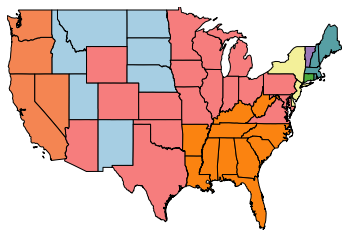

In [63]:
maps.plot_choropleth(shp, regions[reorder], 'unique_values')

In [64]:
usy.cluster('arisel', ['Y_1929'], 8, wType='queen', inits=10, dissolve=0)


Getting variables
Variables successfully extracted
Running original Arisel algorithm
Number of areas:  48
Number of regions:  8
initial Solution:  [0, 4, 0, 1, 4, 6, 6, 0, 0, 4, 5, 5, 4, 4, 2, 0, 3, 5, 6, 5, 4, 0, 4, 7, 4, 1, 3, 6, 0, 6, 0, 4, 5, 0, 4, 5, 6, 0, 4, 2, 0, 4, 3, 2, 4, 2, 4, 7]
initial O.F:  320792.0
FINAL SOLUTION:  [0, 4, 0, 1, 7, 6, 6, 0, 0, 4, 5, 5, 4, 4, 0, 0, 3, 5, 6, 5, 4, 0, 4, 4, 4, 1, 3, 6, 0, 6, 0, 4, 5, 0, 4, 5, 6, 0, 4, 0, 0, 4, 3, 2, 4, 2, 5, 7]
FINAL OF:  311057.0
Done
Adding variables
Done


In [65]:
regions = usy.region2areas

In [66]:
regions = np.array(regions)

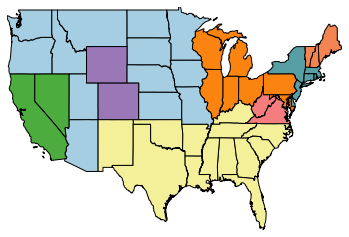

In [67]:
maps.plot_choropleth(shp, regions[reorder], 'unique_values')

In [ ]:
names = ["Y_%d"%i for i in range(1929, 2010)]
#usy.cluster('arisel', ['Y_1929'], 8, wType='queen', inits=10, dissolve=0)
usy.cluster('arisel', names, 8, wType='queen', inits=10, dissolve=0)


In [ ]:
regions = usy.region2areas
regions = np.array(regions)
maps.plot_choropleth(shp, regions[reorder], 'unique_values', title='All Years')

In [ ]:
ps.version

In [ ]:
usy.cluster('arisel', names[:40], 8, wType='queen', inits=10, dissolve=0)
regions = usy.region2areas
regions = np.array(regions)
maps.plot_choropleth(shp, regions[reorder], 'unique_values', title='1929-68')

In [ ]:
usy.cluster('arisel', names[40:], 8, wType='queen', inits=10, dissolve=0)
regions = usy.region2areas
regions = np.array(regions)
maps.plot_choropleth(shp, regions[reorder], 'unique_values', title='1969-2009')

In [ ]:
usy.cluster('arisel', names[40:], 8, wType='queen', inits=10, dissolve=0)

In [ ]:
usy.dataOperation("CONSTANT = 1")
usy.Wrook = usy.Wqueen
usy.cluster('maxpTabu', ['Y_1929', 'Y_1929'], threshold=1000, dissolve=0)
regions = usy.region2areas
regions = np.array(regions)
maps.plot_choropleth(shp, regions[reorder], 'unique_values', title='maxp 1929')

In [ ]:
Counter(regions)

In [ ]:
usy.getVars('Y_1929')

In [ ]:
usy.Wrook

In [ ]:
usy.cluster('maxpTabu', ['Y_1929', 'CONSTANT'], threshold=8, dissolve=0)
regions = usy.region2areas
regions = np.array(regions)
maps.plot_choropleth(shp, regions[reorder], 'unique_values', title='maxp 1929')

In [ ]:
regions

In [ ]:
Counter(regions)

In [ ]:
vars = names

In [ ]:
vars.append('CONSTANT')

In [ ]:
vars

In [ ]:
usy.cluster('maxpTabu', vars, threshold=8, dissolve=0)
regions = usy.region2areas
regions = np.array(regions)
maps.plot_choropleth(shp, regions[reorder], 'unique_values', title='maxp 1929-2009')

In [ ]:
Counter(regions)

In [ ]:
south = cp.loadArcData(ps.examples.get_path("south.shp"))

In [ ]:
south.fieldNames

In [ ]:
# uncomment if you have some time ;->
#south.cluster('arisel', ['HR70'], 20, wType='queen', inits=10, dissolve=0)

In [ ]:
#regions = south.region2areas

In [ ]:
shp = ps.examples.get_path('south.shp')
#maps.plot_choropleth(shp, np.array(regions), 'unique_values')

In [ ]:
south.dataOperation("CONSTANT = 1")
south.cluster('maxpTabu', ['HR70', 'CONSTANT'], threshold=70, dissolve=0)
regions = south.region2areas
regions = np.array(regions)
maps.plot_choropleth(shp, regions, 'unique_values', title='maxp HR70 threshold=70')

In [ ]:
Counter(regions)